<a href="https://colab.research.google.com/github/Thomas-George-T/Streamlit-YouTube-Dashboard/blob/main/YouTube_EDA_%26_Sentimental_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# YouTube NLP

## Ingesting Comments from the YouTube Video

In [ ]:
api_key = ''

In [ ]:
from googleapiclient.discovery import build

# The string after v=? in the url
video_id = "Il0S8BoucSA"

# creating youtube resource object
youtube = build('youtube', 'v3',
developerKey=api_key)

# retrieve youtube video results
video_response=youtube.commentThreads().list(
  part='snippet',
  maxResults=200,
  order='relevance',
  videoId=video_id
).execute()

## Data Preprocessing

### Data Wrangling

#### Assumptions


*   Picking only the comment made by the original author
  *   Comment Threads on the Original Authors comment could be diverging from the video
  *   Limiting Response to about 10 for testing

*   Using the 'textOriginal' instead of 'textDisplay' for easier cleanup of the comment


*   Analyzing only English Comments 
  *   Storing the number of non English comments for metrics








In [ ]:
# empty list for storing reply
comments = []

# extracting required info from each result object
for item in video_response['items']:

  # Extracting comments
  comment = item['snippet']['topLevelComment']['snippet']['textOriginal']
  # Extracting author
  author = item['snippet']['topLevelComment']['snippet']['authorDisplayName']
  # Extracting published time
  published_at = item['snippet']['topLevelComment']['snippet']['publishedAt']
  # Extracting likes
  like_count = item['snippet']['topLevelComment']['snippet']['likeCount']
  # Extracting total replies to the comment
  reply_count = item['snippet']['totalReplyCount']

  comments.append([author, comment, published_at, like_count, reply_count])

In [ ]:
len(comments)

100

Test with Pandas

In [ ]:
comments[0:5]

[['CnX Adventurers',
  'This is shows the new Ed Sheeran... Very confident, energetic and colorful... Love it 😘😍',
  '2021-09-14T14:22:56Z',
  6262,
  168],
 ['MaryCris Estrella',
  "I love how different Ed Sheeran is in his new album especially in Shivers. He's so fun and lovely to watch in here. I'm loving this side of him. We love you, Ed. Keep making lovely music.",
  '2022-12-06T01:14:02Z',
  149,
  8],
 ['Kayla Gorrano',
  'The day this video was released was the day my daughter was born. I’ll never forget it. Now we sing to it! This song and “Clover Cage - Frozen In Time” are the two songs keeping me sane through these tough times. I just want to send love to everyone and I want everyone to know things will get better. We are in this together..I love you ❤️',
  '2022-12-18T13:56:14Z',
  138,
  6],
 ['あこ',
  "It's fun to see Ed Sheeran enjoying his music videos as well as his songs!",
  '2022-12-21T01:37:34Z',
  91,
  1],
 ['Miguel Paulín',
  "Can't stop listening to this awesome

### NLP

#### Install Libraries

In [ ]:
pip install Unidecode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install langdetect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install pycountry

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install clean-text

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#### Text Processing

In [ ]:
len(comments)

100

In [ ]:
import pandas as pd
df = pd.DataFrame({'Author': [i[0] for i in comments], 'Comment': [i[1] for i in comments], 'Timestamp': [i[2] for i in comments],
                  'Likes': [i[3] for i in comments], 'TotalReplies': [i[4] for i in comments]})

In [ ]:
df.head()

,Author,Comment,Timestamp,Likes,TotalReplies
0,CnX Adventurers,This is shows the new Ed Sheeran... Very confi...,2021-09-14T14:22:56Z,6262,168
1,MaryCris Estrella,I love how different Ed Sheeran is in his new ...,2022-12-06T01:14:02Z,149,8
2,Kayla Gorrano,The day this video was released was the day my...,2022-12-18T13:56:14Z,138,6
3,あこ,It's fun to see Ed Sheeran enjoying his music ...,2022-12-21T01:37:34Z,91,1
4,Miguel Paulín,"Can't stop listening to this awesome song, I l...",2022-12-06T22:12:44Z,91,3


In [ ]:
from cleantext import clean

# Remove extra spaces and make them lower case. Replace special emojis
clean_df = df
clean_df['Comment'] = clean_df['Comment'].apply(lambda x: x.strip().lower().replace('xd','').replace('<3',''))

# Clean text from line breaks, unicodes, emojis and punctuations
clean_df['Comment'] = clean_df['Comment'].apply(lambda x: clean(x, no_emoji=True, no_punct=True, no_line_breaks=True, fix_unicode=True))
clean_df.head()

,Author,Comment,Timestamp,Likes,TotalReplies
0,CnX Adventurers,this is shows the new ed sheeran very confiden...,2021-09-14T14:22:56Z,6262,168
1,MaryCris Estrella,i love how different ed sheeran is in his new ...,2022-12-06T01:14:02Z,149,8
2,Kayla Gorrano,the day this video was released was the day my...,2022-12-18T13:56:14Z,138,6
3,あこ,its fun to see ed sheeran enjoying his music v...,2022-12-21T01:37:34Z,91,1
4,Miguel Paulín,cant stop listening to this awesome song i lov...,2022-12-06T22:12:44Z,91,3


In [ ]:
display(clean_df['Comment'])

0     this is shows the new ed sheeran very confiden...
1     i love how different ed sheeran is in his new ...
2     the day this video was released was the day my...
3     its fun to see ed sheeran enjoying his music v...
4     cant stop listening to this awesome song i lov...
                            ...                        
95    im just super enjoying watching ed relax into ...
96    this song recharge me on boring time love this...
97    this is genuinely one of my favourite songs by...
98    this is just so precious it has everything ter...
99                                      nagyon szeretem
Name: Comment, Length: 100, dtype: object

In [ ]:
from langdetect import detect, LangDetectException
def det_lang(language):
    """ Function to detect language
    Args:
        Language column from the dataframe
    Returns:
        Detected Language or Other
    """
    try:
        lang = detect(language)
    except LangDetectException:
        lang = 'Other'
    return lang

In [ ]:
clean_df['Language'] = clean_df['Comment'].apply(det_lang)
clean_df.head()

,Author,Comment,Timestamp,Likes,TotalReplies,Language
0,CnX Adventurers,this is shows the new ed sheeran very confiden...,2021-09-14T14:22:56Z,6262,168,en
1,MaryCris Estrella,i love how different ed sheeran is in his new ...,2022-12-06T01:14:02Z,149,8,en
2,Kayla Gorrano,the day this video was released was the day my...,2022-12-18T13:56:14Z,138,6,en
3,あこ,its fun to see ed sheeran enjoying his music v...,2022-12-21T01:37:34Z,91,1,en
4,Miguel Paulín,cant stop listening to this awesome song i lov...,2022-12-06T22:12:44Z,91,3,en


In [ ]:
import pycountry
# Convert ISO country codes to Languages
clean_df['Language'] = clean_df['Language'].apply(lambda x: pycountry.languages.get(alpha_2=x).name if(x) != 'Other' else 'Not-Detected')
clean_df.head()

,Author,Comment,Timestamp,Likes,TotalReplies,Language
0,CnX Adventurers,this is shows the new ed sheeran very confiden...,2021-09-14T14:22:56Z,6262,168,English
1,MaryCris Estrella,i love how different ed sheeran is in his new ...,2022-12-06T01:14:02Z,149,8,English
2,Kayla Gorrano,the day this video was released was the day my...,2022-12-18T13:56:14Z,138,6,English
3,あこ,its fun to see ed sheeran enjoying his music v...,2022-12-21T01:37:34Z,91,1,English
4,Miguel Paulín,cant stop listening to this awesome song i lov...,2022-12-06T22:12:44Z,91,3,English


In [ ]:
clean_df.count()

Author          100
Comment         100
Timestamp       100
Likes           100
TotalReplies    100
Language        100
dtype: int64

In [ ]:
clean_df.drop(clean_df[clean_df['Language'] == 'Not-Detected'].index, inplace = True)

## Text Blob


In [ ]:
from nltk.sentiment.util import *
from textblob import TextBlob
from nltk import tokenize
# New variable for TextBlob approach
textBlob = clean_df.loc[clean_df['Language']=='English']

def get_polarity(text):
  return TextBlob(text).sentiment.polarity

textBlob['TextBlob_Polarity'] = textBlob['Comment'].apply(get_polarity)

<ipython-input-24-6dc022b8ac93>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  textBlob['TextBlob_Polarity'] = textBlob['Comment'].apply(get_polarity)


In [ ]:
textBlob['TextBlob_Sentiment_Type']=''
textBlob.loc[textBlob.TextBlob_Polarity>0,'TextBlob_Sentiment_Type']='POSITIVE'
textBlob.loc[textBlob.TextBlob_Polarity==0,'TextBlob_Sentiment_Type']='NEUTRAL'
textBlob.loc[textBlob.TextBlob_Polarity<0,'TextBlob_Sentiment_Type']='NEGATIVE'

<ipython-input-25-a2cc16ededd8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  textBlob['TextBlob_Sentiment_Type']=''
/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [ ]:
textBlob.TextBlob_Sentiment_Type.value_counts()

POSITIVE    29
NEUTRAL     10
NEGATIVE     3
Name: TextBlob_Sentiment_Type, dtype: int64

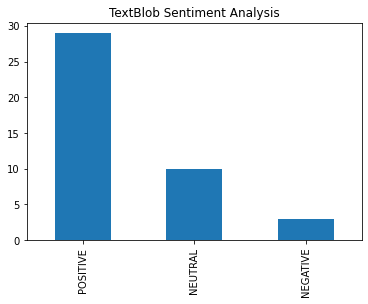

In [ ]:
textBlob.TextBlob_Sentiment_Type.value_counts().plot(kind='bar',title="TextBlob Sentiment Analysis")

## Vader

In [ ]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

vader_df = clean_df.loc[clean_df['Language']=='English']

sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
vader_df['vader_scores'] = vader_df['Comment'].apply(lambda Comment: sid.polarity_scores(Comment))
vader_df.head()

<ipython-input-29-89412567477f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vader_df['vader_scores'] = vader_df['Comment'].apply(lambda Comment: sid.polarity_scores(Comment))


,Author,Comment,Timestamp,Likes,TotalReplies,Language,vader_scores
0,Rick Astley,1 billion views for never gonna give you up am...,2021-07-28T21:00:32Z,1166879,497,English,"{'neg': 0.127, 'neu': 0.476, 'pos': 0.397, 'co..."
1,H1K,this isnt your first time here and you know it,2019-10-31T21:38:49Z,994100,494,English,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
6,Dylan,its come to the point that being rickrolled is...,2019-12-13T18:58:53Z,157769,490,English,"{'neg': 0.0, 'neu': 0.783, 'pos': 0.217, 'comp..."
8,Peanut,no matter what you say you got rick rolled don...,2023-01-03T19:29:05Z,4,0,English,"{'neg': 0.153, 'neu': 0.628, 'pos': 0.219, 'co..."
11,dumb bee FBI edition,sometimes you just gotta rickroll yourself bec...,2019-07-23T06:54:55Z,143827,481,English,"{'neg': 0.18, 'neu': 0.82, 'pos': 0.0, 'compou..."


In [ ]:
vader_df['compound'] = vader_df['vader_scores'].apply(lambda score_dict: score_dict['compound'])
vader_df['vader_sentiment_type']=''
vader_df.loc[vader_df.compound>0,'vader_sentiment_type']='POSITIVE'
vader_df.loc[vader_df.compound==0,'vader_sentiment_type']='NEUTRAL'
vader_df.loc[vader_df.compound<0,'vader_sentiment_type']='NEGATIVE'

<ipython-input-33-69a074b60d0e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vader_df['compound'] = vader_df['vader_scores'].apply(lambda score_dict: score_dict['compound'])
<ipython-input-33-69a074b60d0e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vader_df['vader_sentiment_type']=''
/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


In [ ]:
vader_df.vader_sentiment_type.value_counts()

POSITIVE    23
NEUTRAL     15
NEGATIVE     4
Name: vader_sentiment_type, dtype: int64

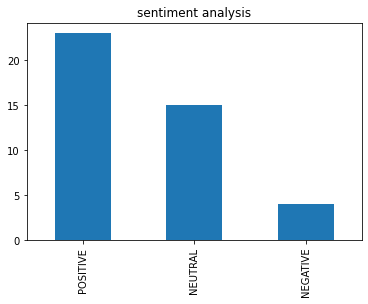

In [ ]:
vader_df.vader_sentiment_type.value_counts().plot(kind='bar',title="sentiment analysis")

## Comparison

In [ ]:
vader_df.groupby(['vader_sentiment_type']).head()

## Conclusion


After the initial analysis and visual inspection. There are more positive and negative counts using TextBlob than Vader.

I think TextBlob is closer to the sentiment outcomes that I expect. Hence picking TextBlob for Sentiment analysis.

# DASHBOARD

A few insights that we draw:
1. Top 10 liked comments
2. Top 10 replies comments
3. Top languages commented in
4. Sentiment analysis on the English comments
5. Metrics: Likes and subscribes
6. Time series chart showing subs gained and Viewer hits


In [ ]:
# -*- coding: utf-8 -*-

# Sample Python code for youtube.videos.list
# See instructions for running these code samples locally:
# https://developers.google.com/explorer-help/code-samples#python

import os

import google_auth_oauthlib.flow
import googleapiclient.discovery
import googleapiclient.errors

# scopes = ["https://www.googleapis.com/auth/youtube.readonly"]

def main():
    # Disable OAuthlib's HTTPS verification when running locally.
    # *DO NOT* leave this option enabled in production.
    # os.environ["OAUTHLIB_INSECURE_TRANSPORT"] = "1"

    api_service_name = "youtube"
    api_version = "v3"
    client_secrets_file = "YOUR_CLIENT_SECRET_FILE.json"

    # Get credentials and create an API client
    flow = google_auth_oauthlib.flow.InstalledAppFlow.from_client_secrets_file(
        client_secrets_file, scopes)
    credentials = flow.run_console()
    youtube = googleapiclient.discovery.build(
        api_service_name, api_version, credentials=credentials)

    request = youtube.videos().list(
        part="snippet,contentDetails,statistics",
        id="dQw4w9WgXcQ"
    )
    response = request.execute()

    print(response)

if __name__ == "__main__":
    main()

## FUNCTIONS

In [ ]:
url = 'https://www.youtube.com/watch?v=dQw4w9WgXcQ'

In [ ]:
video_id = url.split('?v=')[-1]
video_id

In [ ]:
from googleapiclient.discovery import build
import pandas as pd
from cleantext import clean
from langdetect import detect, LangDetectException
import pycountry
from textblob import TextBlob


def get_polarity(text):
    """Function to get the polarity
    Args:
      text: Text used as input to determin the polarity
    Returns:
      Returns emotions expressed in a sentence.
    """
    return TextBlob(text).sentiment.polarity

def get_sentiment(polarity):
   if polarity > 0:
    return 'POSITIVE'
   elif polarity<0:
    return 'NEGATIVE' 
   else:
     return 'NEUTRAL'


def parse_video(url) -> pd.DataFrame:
    """
    Args:
      url: URL Of the video to be parsed
    Returns:
      Dataframe with the processed and cleaned values
    """
    api_key = ''
    # Get the video_id from the url
    video_id = url.split('?v=')[-1]

    # creating youtube resource object
    youtube = build('youtube', 'v3',
    developerKey=api_key)

    # retrieve youtube video results
    video_response=youtube.commentThreads().list(
    part='snippet',
    maxResults=1000,
    order='relevance',
    videoId=video_id
    ).execute()

    # empty list for storing reply
    comments = []

    # extracting required info from each result object
    for item in video_response['items']:

        # Extracting comments
        comment = item['snippet']['topLevelComment']['snippet']['textOriginal']
        # Extracting author
        author = item['snippet']['topLevelComment']['snippet']['authorDisplayName']
        # Extracting published time
        published_at = item['snippet']['topLevelComment']['snippet']['publishedAt']
        # Extracting likes
        like_count = item['snippet']['topLevelComment']['snippet']['likeCount']
        # Extracting total replies to the comment
        reply_count = item['snippet']['totalReplyCount']

        comments.append([author, comment, published_at, like_count, reply_count])

    df = pd.DataFrame({'Author': [i[0] for i in comments], 
                      'Comment': [i[1] for i in comments], 
                      'Timestamp': [i[2] for i in comments],
                    'Likes': [i[3] for i in comments], 
                    'TotalReplies': [i[4] for i in comments]})

    # Remove extra spaces and make them lower case. Replace special emojis
    df['Comment'] = df['Comment'].apply(lambda x: x.strip().lower().
                                        replace('xd','').replace('<3',''))

    # Clean text from line breaks, unicodes, emojis and punctuations
    df['Comment'] = df['Comment'].apply(lambda x: clean(x, 
    no_emoji=True,
    no_punct=True,
    no_line_breaks=True,
    fix_unicode=True))

    # Detect the languages of the comments
    df['Language'] = df['Comment'].apply(lambda x: detect(x))

    # Convert ISO country codes to Languages
    df['Language'] = df['Language'].apply(lambda x: pycountry.languages.get(alpha_2=x).name)

    # Determining the polarity based on english comments
    df['TextBlob_Polarity'] = df[['Comment','Language']].apply(lambda x: get_polarity(x['Comment']) if x['Language'] == 'English' else '', axis=1)

    df['TextBlob_Sentiment_Type'] = df['TextBlob_Polarity'].apply(lambda x: get_sentiment(x) if type(x)==float else '')


    return df

In [ ]:
df3 = parse_video('https://www.youtube.com/watch?v=dQw4w9WgXcQ')
df3.head()

,Author,Comment,Timestamp,Likes,TotalReplies,Language,TextBlob_Polarity,TextBlob_Sentiment_Type
0,Rick Astley,1 billion views for never gonna give you up am...,2021-07-28T21:00:32Z,1167467,497,English,0.333333,POSITIVE
1,Dylan,its come to the point that being rickrolled is...,2019-12-13T18:58:53Z,157795,491,English,0.0,NEUTRAL
2,Alain Flores,esta cancion es genialtanto tiempo y no ha sid...,2023-01-02T16:48:50Z,498,20,Spanish,,
3,Lukas,naah temardo en verdad 32707124 personas ya lo...,2023-01-02T16:26:56Z,511,17,Spanish,,
4,breaking of the game 067,aparte de auto rickroll es muy buena fue un te...,2023-01-02T20:58:42Z,134,5,Spanish,,
